# BGR -> GRAY 

bgr 이미지(3 channel)를 받아 gray(1 channel)로 바꾸는 함수를 만들고, 내장함수와 비교해보자

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

## my_bgr2gray

In [2]:
def my_bgr2gray(src):
    '''
    :param src:컬러 이미지
    :return dst1, dst2, dst3:흑백 이미지
    '''

    #cvtColor() 함수 이용
    dst1 = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    
    #dst2는 B, G, R채널 각각 1/3씩 사용
    (h,w,c) = src.shape
    dst2 = np.zeros((h,w))
    dst2 = (src[:,:,0]*1/3) + (src[:,:,1]*1/3) + (src[:,:,2]*1/3)

    #dst3은 B, G, R채널 중 하나의 채널만 사용(B,G,R중 원하는거 아무거나)
    # B channel 사용

    dst3 = src[:,:,0]

    #dst2 반올림 np.round를 사용해도 무관
    dst2 = (dst2+0.5).astype(np.uint8)
    return dst1, dst2, dst3

dst1 : cv2의 내장함수 cvtColor를 사용해 BGR image를 Gray 이미지로 바꿈

dst2 : b, g, r 채널을 각각 1/3씩 곱해 평균을 구함

dst3 : b, g, r 채널 중 한 채널만 사용함

## fruits.jpg 비교

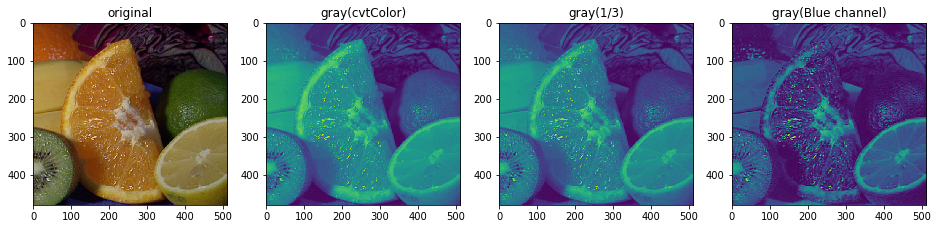

In [3]:
src = cv2.imread('fruits.jpg')
#src = cv2.imread('Lena.png')
#src = cv2.imread('Penguins.png')

A = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
dst1, dst2, dst3 = my_bgr2gray(src)

f, ax = plt.subplots(1,4, figsize = (16,9))

ax[0].set_title('original')
ax[0].imshow(A)

ax[1].set_title('gray(cvtColor)')
ax[1].imshow(dst1)

ax[2].set_title('gray(1/3)')
ax[2].imshow(dst2)

ax[3].set_title('gray(Blue channel)')
ax[3].imshow(dst3)


gray(cvtColor)와 gray(1/3)를 비교해보면 gray(1/3)이 붉은 계열인 오렌지가 더 어두운 느낌이 든다. 이를 통해 cvtColor는 R channel을 1/3보다 더 쓰는것을 알 수 있다.

gray(one channel)에서 사용한 channel은 B channel만 가져왔다. 2,3번째 사진과 비교하면 엄청 어두워졌는데 그 이유는 원본 그림에 파란색이 거의 없기 때문이다.

다음은 각 채널별 색을 비교해보자

In [4]:
# Blue channel
dst4 = src[:,:,0]

# Green channel
dst5 = src[:,:,1]

# Red channel
dst6 = src[:,:,2]

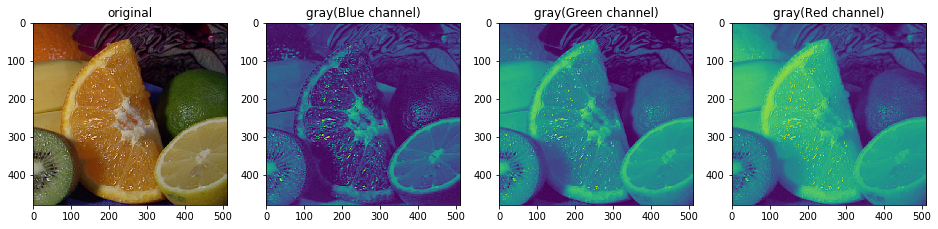

In [5]:
f, ax = plt.subplots(1,4, figsize = (16,9))

ax[0].set_title('original')
ax[0].imshow(A)

ax[1].set_title('gray(Blue channel)')
ax[1].imshow(dst4)

ax[2].set_title('gray(Green channel)')
ax[2].imshow(dst5)

ax[3].set_title('gray(Red channel)')
ax[3].imshow(dst6)

왼쪽부터 blue, green, red channel이다. 이 사진을 통해 원본과 비슷한 색을 가진 채널의 value는 크고, 아닌 것의 value는 작은것을 알 수 있다.

## Lena.png 비교

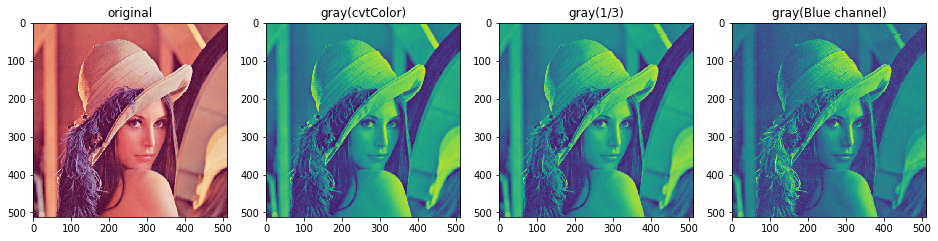

In [6]:
#src = cv2.imread('fruits.jpg')
src = cv2.imread('Lena.png')
#src = cv2.imread('Penguins.png')

A = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
dst1, dst2, dst3 = my_bgr2gray(src)

f, ax = plt.subplots(1,4, figsize = (16,9))

ax[0].set_title('original')
ax[0].imshow(A)

ax[1].set_title('gray(cvtColor)')
ax[1].imshow(dst1)

ax[2].set_title('gray(1/3)')
ax[2].imshow(dst2)

ax[3].set_title('gray(Blue channel)')
ax[3].imshow(dst3)


모자의 파란 털을 제외하면 대부분이 붉은색을 띄는 그림이다. 따라서 blue channel에서 파란 털은 상대적으로 밝고, 붉은 부분은 어두운 느낌을 받을 수 있다. blue channel인데 털보다 모자가 더 밝다고 생각할 수 있는데, 흰색같은경우 R,G,B의 value가 모두 크기 때문에 당연하다.

In [7]:
# Blue channel
dst4 = src[:,:,0]

# Green channel
dst5 = src[:,:,1]

# Red channel
dst6 = src[:,:,2]

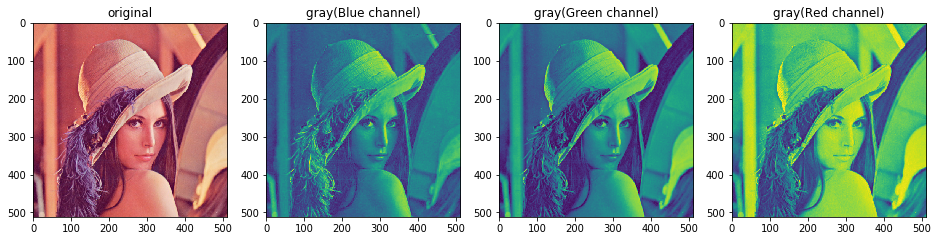

In [8]:
f, ax = plt.subplots(1,4, figsize = (16,9))

ax[0].set_title('original')
ax[0].imshow(A)

ax[1].set_title('gray(Blue channel)')
ax[1].imshow(dst4)

ax[2].set_title('gray(Green channel)')
ax[2].imshow(dst5)

ax[3].set_title('gray(Red channel)')
ax[3].imshow(dst6)

붉은색 channel에서 매우 밝은것을 확인할 수 있다.